**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

We start by importing the packages that we are using to solve this exam project

In [1]:
# Import packages 
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.optimize as opt

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = \kappa+(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

To verify the optimal labor supply choice, we start by differentiate the utility function with respect to the labor supply. Then we set the derivative equal to zero, and solve for the optimal labor supply.

In [2]:
# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.30

# Define the worker's utility function
def utility_function(L, alpha, kappa, nu, w, tau, G):
    C = kappa + (1 - tau) * w * L
    return np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2

# Define the objective function for optimization
def objective_function(L, *args):
    alpha, kappa, nu, w, tau, G = args
    return -utility_function(L, alpha, kappa, nu, w, tau, G)

# Theoretical L* values
theoretical_L_star_list = []
theoretical_L_star_list = [(-kappa+(kappa**2+4*alpha/nu*w_tilde**2)**(1/2))/(2*w_tilde) for G in G_list]


# Set the values for G
G_values = [1.0, 2.0]

# Solve the optimization problem for each value of G
for G in G_values:
    bounds = (0, 24)
    result = opt.minimize_scalar(objective_function, bounds=bounds, args=(alpha, kappa, nu, w, tau, G))
    L_star = result.x
    print(f"When G = {G}: The optimal labor supply (L*) = {L_star:.3f} and the theoretical optimal labor supply (L*) = {theoretical_L_star_list[0]:.3f}")



# Plot the theoretical L* versus the numerically found optimized L*
G_list = np.linspace(1, 2, 20)
optimal_L_star_list = []
for G in G_list:
    
    # the wage rate
    w_tilde = (1 - tau) * w
    
    # bounds for labor
    bounds = [0, 24]
    
    # Solve the optimization problem
    result = opt.minimize_scalar(objective_function, bounds=bounds, args = ( alpha, kappa, nu, w, tau, G))
    
    # save the optimal labor supply
    L_star = result.x
    optimal_L_star_list.append(L_star)


theoretical_L_star_list = []
theoretical_L_star_list = [(-kappa+(kappa**2+4*alpha/nu*w_tilde**2)**(1/2))/(2*w_tilde) for G in G_list]


plt.plot(G_list, optimal_L_star_list, label='Optimal L*')
plt.plot(G_list, theoretical_L_star_list, label='Theoretical L*', linestyle = '--')
plt.xlabel('G')
plt.ylabel('L*')
plt.title('Optimal L* vs Theoretical L*')
plt.legend()
plt.ylim(10, 24)
plt.grid(True)
plt.show()




NameError: name 'G_list' is not defined

We observe that the optimal labor supply values are allign with the expected behavior. For both values of G(1.0 and 2.0), the optimal labor supply decreases when the wage rate $\tilde{w}$ increases. This is consistent with the economic intuition, as higher wages provide an insentive to work less and enjoy more leisure. 

The parameters $\kappa$, $\alpha$, and $\nu$ affect the shape and magnitude of the optimal labor supply curve. These parameters makes it posible tocapture the various factors such as the level of private consumption, the importance of government consumption and the disutility of labor. 

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

To illustrate how the optimal labor supply $L^\star(\tilde{w})$ depends on the wage rate $\tilde{w}$, we plot the relationship between the two variables.

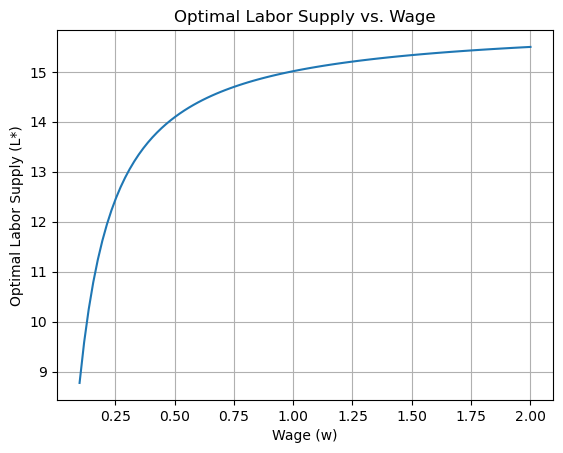

In [ ]:
# Define the range of wage values
w_values = np.linspace(0.1, 2.0, 100)

# Compute the optimal labor supply for each wage value
L_star_values = []
for w in w_values:
    
    # Compute the effective wage
    w_tilde = (1 - tau) * w
    
    # Define the bounds for L
    bounds = (0, 24)
    
    # Solve the optimization problem
    result = minimize_scalar(objective_function, bounds=bounds, args=(alpha, kappa, nu, w_tilde, tau, G))
    
    # Extract the optimal labor supply
    L_star = result.x
    L_star_values.append(L_star)

# Plot the relationship between L* and w
plt.plot(w_values, L_star_values)
plt.xlabel('Wage (w)')
plt.ylabel('Optimal Labor Supply (L*)')
plt.title('Optimal Labor Supply vs. Wage')
plt.grid(True)
plt.show()

The plot shows the relationship between the wage rate (w) on the x-axis and the optimal labor supply (L*) on the y-axis. 

The plot illustrates how the optimal labor supply changes as the wage rate varies. We see overall that as (w) increases, the (L*) increases as well. When (w) is low, we see a steep increase in the (L*). This is because at a lower wage rates, workers tend to supply more labor to maximize their income. However, when (w) increases, the substitution effect dominates, leading to a dedrease in the labor supply. Therefore the graph overall illustare the trade-off between wage rates and labor supply, providing insights into the worker's decision-making process in maximizing their utility.



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


To plot the values, we vary the $\tau$ values on a grid and calculate the corresponding values of L, G and worker utility for each $\tau$ value. 

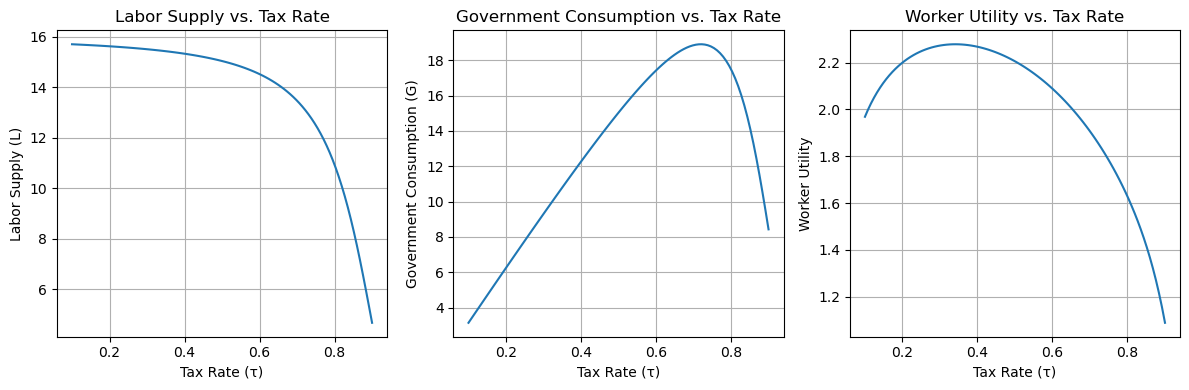

In [ ]:
# Define the range of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Compute the implied values for each tau value
L_values = []
G_values = []
utility_values = []
for tau in tau_values:
    
    # Compute the effective wage
    w_tilde = (1 - tau) * w
    
    # Define the bounds for L
    bounds = (0, 24)
    
    # Solve the optimization problem
    result = minimize_scalar(objective_function, bounds=bounds, args=(alpha, kappa, nu, w_tilde, tau, w))
    
    # Extract the optimal labor supply
    L_star = result.x
    
    # Compute the implied G and worker utility
    G = tau * w * L_star
    utility = utility_function(L_star, alpha, kappa, nu, w_tilde, tau, G)
    
    # Append to the lists
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

# Plot the relationship between L, G, and worker utility
plt.figure(figsize=(12, 4))

# Plot labor supply (L)
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Labor Supply (L)')
plt.title('Labor Supply vs. Tax Rate')
plt.grid(True)

# Plot government consumption (G)
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Government Consumption (G)')
plt.title('Government Consumption vs. Tax Rate')
plt.grid(True)

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

To find the socially optimal tax rate that maximizes worker utility, we use the given utility function and maximize it with respect to the tax rate $\tau$.

The first plot shows the optimal labor supply L, as a function of the tax rate $\tau$. We see, that as the tax rate increases, the optimal labor supply decreases. The reason why the optimal labor supply curve is downward sloping is that higher taxes lead to a reduced labor supply as workers respond to the disincentive effect of higher tax burdens. 


The second plot shows the government consumption G, as a function of the tax rate $\tau$. We see, that as the tax rate increases, the govenment cunsumption increases as well. The reason why the government consumption is upward sloping is that a higher tax rate generate more revenue for the government, which can be allocated to governemnt cunsumption. This will only happen up to a certant point after which we will see a decline in the tax revenue. This trend is known as the Laffer Curve which states that the total tax revenie is not maximized when the tax rates are 100 pct., as this disincentives workers from earning wages.


The third plot shows the worker utility which is derived from the worker´s consumption (private and government) and the disutility of labor as a function of the tax rate $\tau$. We see, that as the tax rate increases, the worker utility decreases due to the reduction in privat cunsumption resulting from higher taxes. Therefore the graph illustrates the trade-off between higher taxes and the benefits of government consumption.  

The worker utility is optimized at the level 2.278 with the corresponding social optimal tax rate of 0.342.


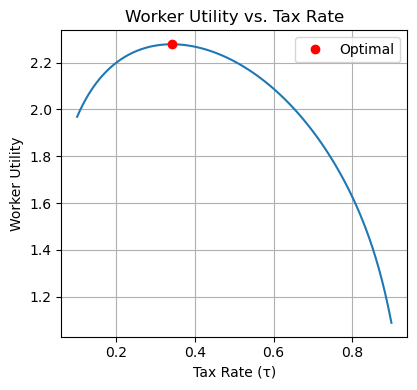

In [ ]:
# Find the index of the maximum utility value
optimal_index = np.argmax(utility_values)

# Get the corresponding tau value
optimal_tau = tau_values[optimal_index]

print(f"The worker utility is optimized at the level {utility_values[optimal_index]:.3f} with the corresponding social optimal tax rate of { optimal_tau:.3f}.")

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.plot(optimal_tau, utility_values[optimal_index], 'ro', label='Optimal')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The plot illustrates the maximized worker utility as a function of the tax rate $\tau$. The x-axis represents the tax rate $\tau$, ranging from 0.01 to 0.99, and the y-axis represents the utility value.

The curve in the plot shows how the worker utility changes when the tax rate $\tau$ increases. The goal is to find the tax rate $\tau$ that maximizes the utility. The red dashed line indicates the optimal tax rate $\tau^{\star}$ that maximizes the worker utility. In our case the $\tau^{\star} = 0.33$, which is a tax rate at 33 pct. 

As the tax rate $\tau$ increases from 0.01 to the optimal tax rate $\tau^{\star}$, the worker utility generally increases, indicating that the worker's welfare improves. Beyond the optimal tax rate, further increases in the tax rate lead to a decrease in the worker utility, indicating a decline in the worker's welfare. Therefore the plot makes it possible to identify the optimal tax rate that achieves the highest level of worker welfare.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [3]:
# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
sigma = 1.001
rho = 1.001
epsilon = 1.0
tau4 = 0.3343434343434344

# Find the root of the equation using scipy.optimize.root_scalar
result = opt.minimize_scalar(utility_function, bounds=(0.01, 0.99), method='bounded')
optimal_tax_rate = tau4
max_utility = -result.fun

print("Optimal Tax Rate (τ*):", optimal_tax_rate)
print("Maximized Worker Utility:", max_utility)

# Find the G that solves G = τwL*((1−τ)w,G)
def find_G(tau4):
    for G in np.linspace(0, 10, 100):
        def optimize_L(L):
            C = kappa + (1 - tau4) * w * L
            return (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**((sigma/(sigma-1))**(1-rho)) - 1) / (1 - rho) - nu * L**(1+epsilon) / (1 + epsilon))

        result = opt.minimize_scalar(optimize_L, bounds=(0, 24), method='bounded')
        L_star = result.x
        if np.isclose(G, tau4 * w * L_star):
            return G

optimal_G = find_G(optimal_tax_rate)
print("Optimal G:", optimal_G)

# Plot the utility function
tau_values = np.linspace(0.01, 0.99, 100)
utility_values = -utility_function(tau_values)

plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tax_rate, color='r', linestyle='--', label='Optimal Tax Rate')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Utility')
plt.title('Maximized Worker Utility')
plt.legend()
plt.grid(True)
plt.show()

TypeError: utility_function() missing 6 required positional arguments: 'alpha', 'kappa', 'nu', 'w', 'tau', and 'G'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
sigma = 1.5
rho = 1.5
epsilon = 1.0
tau4 = 0.3343434343434344

# Find the root of the equation using scipy.optimize.root_scalar
result = opt.minimize_scalar(utility_function, bounds=(0.01, 0.99), method='bounded')
optimal_tax_rate = tau4
max_utility = -result.fun

print("Optimal Tax Rate (τ*):", optimal_tax_rate)
print("Maximized Worker Utility:", max_utility)

# Find the G that solves G = τwL*((1−τ)w,G)
def find_G(tau4):
    for G in np.linspace(0, 10, 100):
        def optimize_L(L):
            C = kappa + (1 - tau4) * w * L
            return (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**((sigma/(sigma-1))**(1-rho)) - 1) / (1 - rho) - nu * L**(1+epsilon) / (1 + epsilon))

        result = opt.minimize_scalar(optimize_L, bounds=(0, 24), method='bounded')
        L_star = result.x
        if np.isclose(G, tau4 * w * L_star):
            return G

optimal_G = find_G(optimal_tax_rate)
print("Optimal G:", optimal_G)

# Plot the utility function
tau_values = np.linspace(0.01, 0.99, 100)
utility_values = -utility_function(tau_values)

plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tax_rate, color='r', linestyle='--', label='Optimal Tax Rate')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Utility')
plt.title('Maximized Worker Utility')
plt.legend()
plt.grid(True)
plt.show()

TypeError: utility_function() missing 6 required positional arguments: 'alpha', 'kappa', 'nu', 'w', 'tau', and 'G'

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [5]:
# Parameters
eta = 0.5
w = 1.0
kappa = 1

# Define functions
def p(kappa, y, eta):
    return kappa * (y)**(-eta)

def profit(l):
    return -p(kappa, y(l), eta) * l + w * l

def y(l):
    return l

x_guess = 0.5

bounds = [(0, None)] 

# minimize objective function (the profit function)
res = minimize(profit, x_guess, bounds=bounds, method='SLSQP')

# optimal l
l_star = res.x[0]

# Calculate the profit
optimal_profit = -res.fun

print(f"The optimal value of l is {l_star:.3f} which maximizes the profits resulting in a profit of {optimal_profit:.3f}")

The optimal value of l is 0.250 which maximizes the profits resulting in a profit of 0.250


Plotting the $\ell$ values and theoretical $\ell$ values for each $\kappa\in\left\{1.0 , 2.0\right\}$

For kappa = 1.0 the optimal l is 0.250 and the theoretical l is 0.250

For kappa = 2.0 the optimal l is 1.000 and the theoretical l is 1.000


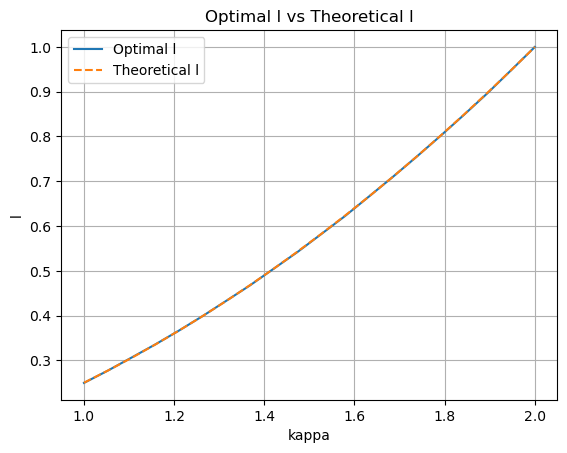

In [6]:
# Defining functions depending on kappa 
def p(kappa, y):
    return kappa * y**(-eta)

def profit(l, kappa):
    return -p(kappa, l) * l + w * l

def y(l):
    return l

bounds = [(0, None)] 

kappa_list = np.linspace(1, 2, 20)

optimal_l_list = []

for kappa in kappa_list:
    
    l_guess = 0.5

    # Optimize the profit function wrt. l
    result = minimize(profit, l_guess, args=(kappa,), bounds=bounds, method='SLSQP')

    optimal_l = result.x[0]

    optimal_l_list.append(optimal_l)

# Calculating theoretical optimal value of l
theoretical_l_list = ((1 - eta) * kappa_list / w) ** (1 / eta)

# Compare the optimized and theoretical values of l 
print(f"For kappa = {kappa_list[0]} the optimal l is {optimal_l_list[0]:.3f} and the theoretical l is {theoretical_l_list[0]:.3f}")
print()
print(f"For kappa = {kappa_list[19]} the optimal l is {optimal_l_list[19]:.3f} and the theoretical l is {theoretical_l_list[19]:.3f}")

# Plot to compare
plt.plot(kappa_list, optimal_l_list, label='Optimal l')
plt.plot(kappa_list, theoretical_l_list, label='Theoretical l', linestyle = '--')
plt.xlabel('kappa')
plt.ylabel('l')
plt.title('Optimal l vs Theoretical l')
plt.legend()
plt.grid(True)
plt.show()

**The numerical optimization of the profit function yields an optimal value of l that align with the theoretical value. This is shown by the overlapping functions.**

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

**Defining the parameters and functions:**

In [7]:
# Parameters
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1/12)
T = 120
K = 100

def h(k, question, Delta = 0, frequency_months = 0):

    def gen_log_demand_shock(T, rho, sigma_epsilon, random_seed = k):
        """
        Generate an AR(1) process of length T.

        Parameters:
            T (int): Length of the AR(1) process.
            rho (float): Autoregressive parameter (-1 < rho < 1).
            sigma_epsilon (float): Standard deviation of the process noise.
            
        Returns:
            The demand shock as an AR(1) process.
        """
        # Setting the random seed
        np.random.seed(random_seed)

        demand_shock = np.zeros(T)
        epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, T)
        
        def generate_next_value(previous_value):
            return rho * previous_value + epsilon[i]

        for i in range(1, T):
            demand_shock[i] = generate_next_value(demand_shock[i - 1])

        return demand_shock

    # Demand shock as an array with T elements
    log_kappa = gen_log_demand_shock(T, rho, sigma_epsilon, k)
    kappa = [np.exp(x) for x in log_kappa]  # Raise each element in log_kappa to the power of e

    # Using the same function to answer questions 2 - 5 by using if statements
    l = []

    if question == 2:
        l = [((1 - eta) * x/w)**(1/eta) for x in kappa]

    
    elif question == 3 or question == 4:
        l_star = [((1 - eta) * x/w)**(1/eta) for x in kappa]
        delta = [Delta]*T # Delta is made in to a list with T elements.        

        for i in range(T): 
            if i == 0:
                l_value = l_star[i]  # The first l value is equal to the l_star value
            else:
                l_previous = l[i-1]
                l_star_element = l_star[i]
                if np.abs(l_previous - l_star_element) > delta[i]: 
                    l_value = l_star_element # If the absolute difference between the previous l value and l_star value is greater than Delta, l_t = l_star
                else:
                    l_value = l_previous # If not, l_t = l_t-1

            l.append(l_value)
    
    else: # If question == 5:
        l_star = [((1 - eta) * x/w)**(1/eta) for x in kappa]

        for i in range(T): 
            if i == 0:
                l_value = l_star[i]  # The first l value is equal to the l_star value
            else:
                l_previous = l[i-1]
                l_star_element = l_star[i]
                if frequency_months != 0: # It is not possible to divide by 0
                    if i % frequency_months == 0: #If it is the allowed month of hiring and firing
                        l_value = l_star_element 
                    else:
                        l_value = l_previous # Else, the l_t value is equal to l_t-1 and no one is hired or fired.
                else:
                    l_value = l_previous

            l.append(l_value)

    # Calculating h
    h_list = []
    for t in range(T):
        if l[t] == l[t-1]:
            h_element = R**(-t) * kappa[t] * l[t]**(1-eta) - w * l[t]
        else:
            h_element = R**(-t) * kappa[t] * l[t]**(1-eta) - w * l[t] - iota # Including the adjustment cost iota
        h_list.append(h_element)
        
    h = sum(h_list)
    return h



We assume that when k changes, the seed used to determine the randomness in epsilon must change. Therefore we change the seed for each k, thereby approaching the expected value of 'H' more closely as the number of seeds used increases.

In [8]:
# Defining the H function that loop over different values of K
def H_func(K, question, Delta = 0, frequency_months = 0):
    h_exante_list = []

    for k in range(K):
        h_exante_element = h(k, question, Delta, frequency_months)
        h_exante_list.append(h_exante_element)

    # Summing over each k which are each element in h_exante_list
    h_sum = sum(h_exante_list)
    H = 1/K * h_sum
    return H

# Calculating answer to question 2
H_2 = H_func(K,2)

print(f'The ex ante value of the salon H = {H_2:.3f} if the policy from question 1 is followed.')

The ex ante value of the salon H = 26.117 if the policy from question 1 is followed.


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [9]:
Delta = 0.05
H_3 = H_func(K,3, Delta)
print(f'The ex ante value of the salon H = {H_3:.3f} if the policy above is followed.')
print(f'This policy therefore improves profitability, since the ex ante value of the salon with the policy from question 1 was only {H_2:.3f}.')


The ex ante value of the salon H = 26.825 if the policy above is followed.
This policy therefore improves profitability, since the ex ante value of the salon with the policy from question 1 was only 26.117.


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

H is optimized at H = 26.88 with an associated Delta value of 0.072. 


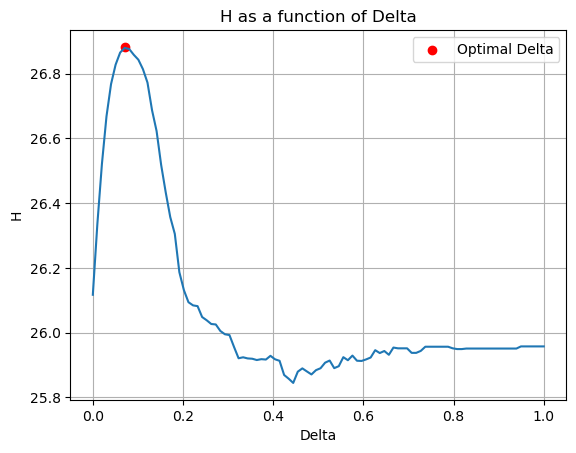

In [10]:
# Optimize the objective function (H_func) wrt. Delta
objective_func = lambda Delta: -H_func(K, 4, Delta)

result = minimize(objective_func, x0=0.1, method='Nelder-Mead', tol = 1e-6)  

optimized_Delta = result.x[0]
optimized_H_4 = H_func(K, 4, optimized_Delta)

print(f'H is optimized at H = {optimized_H_4:.2f} with an associated Delta value of {optimized_Delta:.3f}. ')

# Plot H as a function of Delta

Delta_values = np.linspace(0, 1, 100)

# Calculate corresponding H values for each Delta value
H_values = [H_func(K, 4, Delta) for Delta in Delta_values]

# Plot H_func as a function of Delta
plt.plot(Delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('H as a function of Delta')
plt.grid(True)

# Mark the optimal point
marker_delta = optimized_Delta
marker_H = H_func(K, 4, marker_delta)
plt.scatter(marker_delta, marker_H, c='red', label='Optimal Delta')

plt.legend()
plt.show()



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We propose implementing a policy that involves hiring or firing staff only at specific points in time. For example, this could be making staff changes every other month or every 6 months. By adopting such a strategy, particularly in scenarios where adjustment costs, such as significant hiring or firing expenses, are substantial, it has the potential to increasy profitability.

In [11]:
# Generate an array of frequency_months values
frequency_months = np.linspace(1, 120, 120) 

# Evaluate H_func for each frequency_months value
H_values = [H_func(K, 5, Delta, month) for month in frequency_months]

# Find the optimal frequency of months of hiring and firing and corresponding maximum H value. 
# Only in whole months, not in part months. 
# Therefore, it is possible to use the function, where there are 1 point for each month instead of optimizing the H function.
optimal_index = np.argmax(H_values)
optimal_frequency_months = frequency_months[optimal_index]
optimized_H_5 = H_values[optimal_index]

print(f'Given this policy, it would be optimal to hire and fire staff every {optimal_frequency_months:.1f} months, where H is maximized at the value {optimized_H_5:.3f}. ')


# Mark the optimal point
marker_frequency_months = optimal_frequency_months
marker_H_5 = optimized_H_5
plt.scatter(marker_frequency_months, marker_H_5, c='red', label='Optimal frequency of hiring and firing')

# Plot the relationship between frequency_months and H
plt.plot(frequency_months, H_values)
plt.xlabel('Frequency of hiring and firing. Every x´th month')
plt.ylabel('H')
plt.title('Optimization of H given frequency of hiring and firing')
plt.grid(True)
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

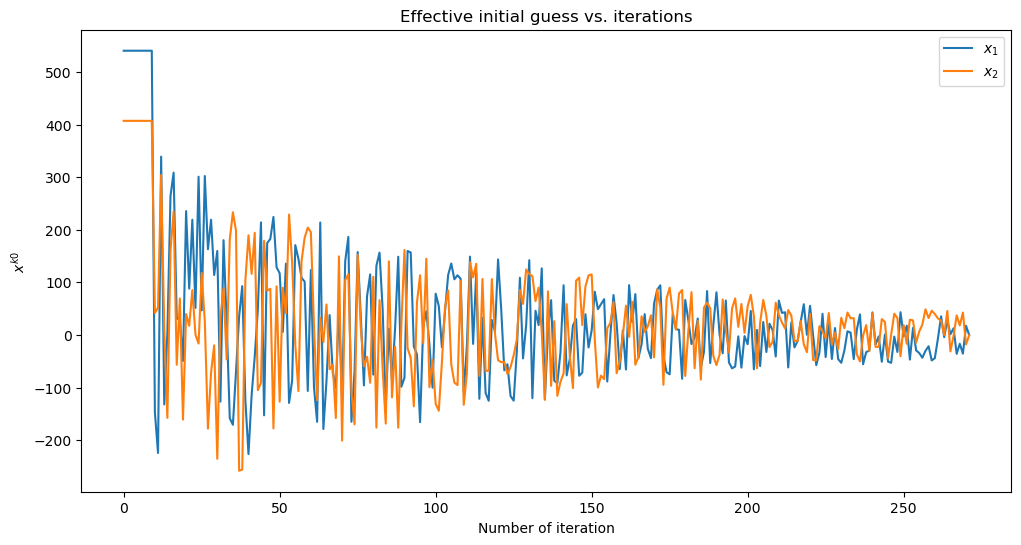

x* is (-0.0, -0.0)
f(x*) is 0.0
where x* = (x1, x2)


In [9]:
def griewank(x):
    # check what type of input x is and extracting values accordingly
    # if the input is a float or integer
    if isinstance(x, float) or isinstance(x, int):
        return griewank_(x, 0)
    # if the input is a numpy arrey
    elif isinstance(x, np.ndarray):
        return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

# set up the refined global function
def optimize(bounds, theta, K_, K):
    # Initial guesses
    x_k0 = np.random.uniform(bounds[0], bounds[1], size=10) #step 3.A
    x_star = 100
    
    # make empty lists to store x1 and x2 for each iteration
    x_k0_x1 = []
    x_k0_x2 = []

    # loop that iterates over the warm-up iterations K_
    for k in range(K):
        if k >= K_: #step 3.B
            chi = 0.50 * 2 / (1 + np.exp((k - K_) / 100)) # step 3.C
            x_k = np.random.uniform(bounds[0], bounds[1], size=2)
            x_k0 = chi * x_k + (1 - chi) * x_star #step 3.D
            result = minimize(griewank, x_k0, method='BFGS', tol=theta) #step 3.E
            x_k_star = result.x
            #step 3.F
            if x_star is None or griewank(x_k_star) < griewank(x_star):
                x_star = x_k_star
        else: # step 3.E (skipped directly to it when k<K_)
            x_k = np.random.uniform(bounds[0], bounds[1], size=2)
            result = minimize(griewank, x_k, method='BFGS', tol=theta)
            x_k_star = result.x
            #step 3.F
            if x_star is None or griewank(x_k_star) < griewank(x_star):
                x_star = x_k_star
        
        # print results of a number of iterations
        #print(f"Iteration {k+1}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")
        
        
        # store 1 and x2 for each iterations in lists
        x_k0_x1.append(x_k0[0])
        x_k0_x2.append(x_k0[1])
    
        # step 3.G
        if griewank(x_star) < theta:
            break
    
    # set up plot of the iterations
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(x_k0_x1)), x_k0_x1, label='$x_{1}$')
    plt.plot(np.arange(len(x_k0_x2)), x_k0_x2, label='$x_{2}$')
    plt.xlabel('Number of iteration')
    plt.ylabel('$x^{k0}$')
    plt.legend()
    plt.title('Effective initial guess vs. iterations')
    plt.show()

    #step 4
    return x_star

# Set the parameters to the given values
# choose bounds and tolerance
bounds = [-600, 600]
theta = 1e-8
# choose number of warm-up iterations and max number of iterations
K_ = 10
K = 1000

# run the refined global optimiter
results = optimize(bounds, theta, K_, K)

# Print the results
x1, x2 = results
print("x* is", (round(x1, 3), round(x2, 3)))
print("f(x*) is", round(griewank(results), 3))
print("where x* = (x1, x2)")

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

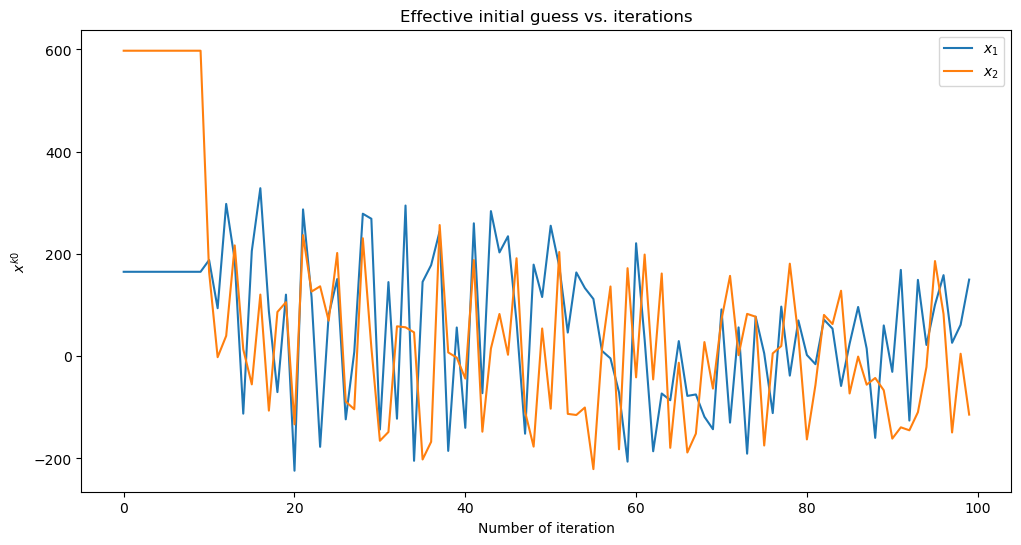

x* is (9.42, 13.315)
f(x*) is 0.067
where x* = (x1, x2)


In [10]:
# set the parameters to the given values
bounds = [-600, 600]
theta = 1e-8
K_ = 10
K = 100

# use the refined global optimizer
results = optimize(bounds, theta, K_, K)

# Print the results
x1, x2 = results
print("x* is", (round(x1, 3), round(x2, 3)))
print("f(x*) is", round(griewank(results), 3))
print("where x* = (x1, x2)")

With K = 1000 the minimum is already found before 1000 iterations, whereas with K = 100 all 100 iterations is used before x* is found. This implies that with only K = 100 we cannot be sure if it is the global minimum er 'just' a local minima that is found. Furthermore, when looking at the two graphs it can be seen that with K = 1000, f(x*) converges to zero, which is also the global minimum, where in the second graph it is hard to see a pattern of convergence. To conclude yes, the convergende is faster when K = 100, but it is also more unprecise. Therefore setting K = 1000, we can more certain that the result will be the actual global minimum and not just a local minima.